In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load a file that represents the opd path in a mirror map. We expect it to be a 2D matrix
fname = 'ETM05_S1_finesse'
measured_map=pd.read_csv(f'{fname}.txt', header=None, sep=" ", skiprows=9).dropna(axis=1).values
# catch the shape
shape = np.shape(measured_map)[0]
# step size
size = 0.0002669951063580811
map_range = shape*size

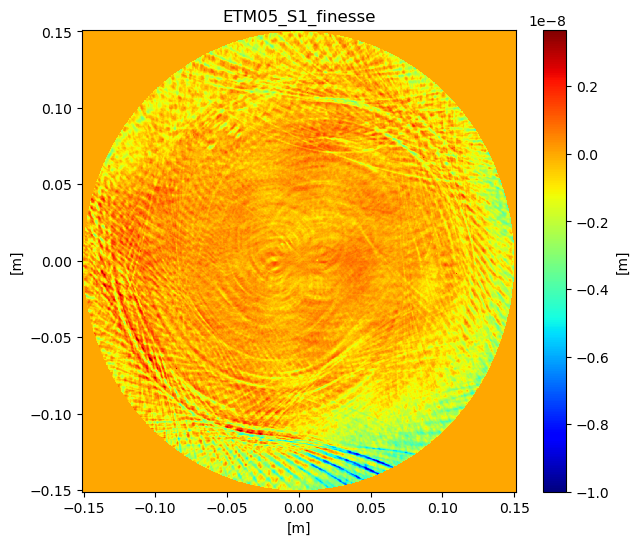

In [3]:
# recentering rand plot real map

# normalization to 1, as that max A_n is 1
m_map=measured_map/np.abs(measured_map).max()

x_range = np.linspace(-map_range/2,map_range/2,1131)                                                                                          
x,y=np.meshgrid(x_range,x_range,sparse=True)
# plot real map
plt.figure(figsize=(7,6))
plt.pcolormesh(x,y,m_map*1e-8,cmap='jet')
plt.xlabel('[m]')
plt.ylabel('[m]')
plt.title(f'{fname}')
# color bar
cb = plt.colorbar()                 
cb.set_label("[m]")
plt.show()

In [4]:
from extendOutside import extendOutside

x_range = np.linspace(-map_range/2,map_range/2,1131)                                                                                          
x,y=np.meshgrid(x_range,x_range,sparse=True)
extended_map, x_extended, y_extended = extendOutside(m_map, x_range, x_range, 0.10, 0.20, 5)

/home/work/Documents/finesse-development/workshop-2023-06-05/ifosimworkshop2023/VirtualMaps/extendOutside.py:164: RuntimeWarning: invalid value encountered in sqrt
  wgt = np.sqrt(1-1/xeps*(1-rg/rfit))


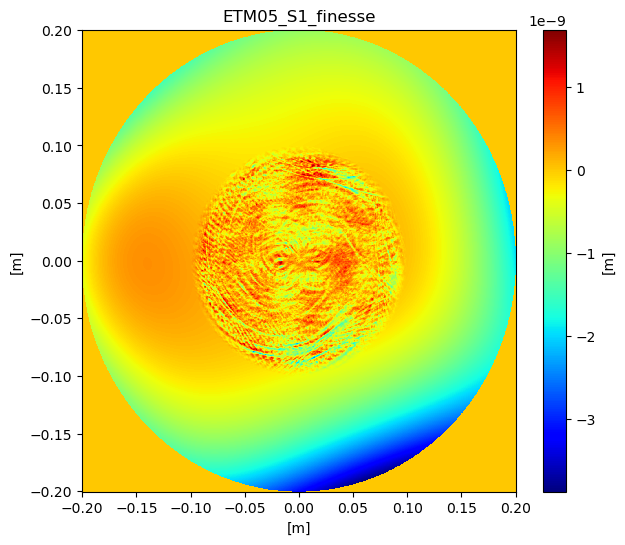

In [5]:
x_new, y_new = np.meshgrid(x_extended, y_extended)
# plot real map
plt.figure(figsize=(7,6))
plt.pcolormesh(x_new,y_new,extended_map*1e-8,cmap='jet')
plt.xlabel('[m]')
plt.ylabel('[m]')
plt.title(f'{fname}')
# color bar
cb = plt.colorbar()                 
cb.set_label("[m]")
plt.show()